# Allegro Recruitment Assignment Solution

**Overview and Instructions:**

Your task is to predict the price of a laptop (buynow_price column in the dataset) based on its attributes. Prepare a model in Jupyter Notebook using Python.

The model will be assessed using the RMSE measure on the test set, for which we’re not sharing the real price. You will find out the result after submitting the assignment so make sure your model doesn’t overfit.

Make sure that the notebook reflects your thought process. It’s better to show all the approaches, not only the final one (e.g. if you tested several models, you can show all of them). We want the path to obtaining the final model to be clearly shown.

Input datasets:
1. train_dataset.json – the dataset you can use to train your model. JSON saved in orient=’columns’ format
(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html).
2. test_dataset.json – the dataset you can use to test your model. JSON saved in orient=’columns’ format
3. val_dataset.json – the dataset you can use as validation dataset in deep learning based regression models. JSON saved in orient=’columns’ format

Please submit:
1. Notebook with your work
2. Dataset in format (index value, your prediction) that we’ll use to calculate the final RMSE – in JSON format with orient=’columns’
(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html).

## Data Exploration

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
# read datasets as intsructed
train_df = pd.read_json("./train_dataset.json", orient="columns")
test_df = pd.read_json("./test_dataset.json", orient="columns")
val_df = pd.read_json("./val_dataset.json", orient="columns")

df = pd.concat([train_df, val_df, test_df], axis=0)
df.head(10)

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2099.0
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,1000.0,producer warranty,"17"" - 17.9""",2699.0
6220,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,[no system],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0
10594,integrated graphics,"[nfc (near field communication), gps]",1920 x 1080,2,8 gb,[windows 10 professional],None,[touchpad],[SD card reader],ddr4,2.5,intel core i5,new,500.0,producer warranty,"15"" - 15.9""",2749.0
11640,integrated graphics,"[wi-fi 802.11 b/g/n/ac, bluetooth, lan 10/100/...",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0


In [3]:
df.dtypes

graphic card type          object
communications             object
resolution (px)            object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
state                      object
drive memory size (GB)    float64
warranty                   object
screen size                object
buynow_price              float64
dtype: object

In [4]:
df.shape

(7853, 17)

In [5]:
# Look at unique values of each column, except the ones formatted as list
for col in df.columns.to_list():
    if type(df[col][0]) != list:
        print(f"unique values of {col} are: ", df[col].unique())
        print("-----------------------------------------------------")


unique values of graphic card type are:  ['dedicated graphics' None 'integrated graphics']
-----------------------------------------------------
unique values of resolution (px) are:  ['1920 x 1080' '1366 x 768' None '2560 x 1440' '1600 x 900' '3840 x 2160'
 'other' '1920 x 1280' '1280 x 800' '3200 x 1800' '2880 x 1620'
 '2160 x 1440' '1920 x 1200' '2560 x 1600']
-----------------------------------------------------
unique values of CPU cores are:  ['4' '2' 'not applicable' '3' '1' '8' '6']
-----------------------------------------------------
unique values of RAM size are:  ['32 gb' '8 gb' None '12 gb' '4 gb' '16 gb' '2 gb' '20 gb' '6 gb' '64 gb'
 '256 mb' '24 gb']
-----------------------------------------------------
unique values of drive type are:  ['ssd + hdd' 'ssd' 'hdd' None 'emmc' 'hybrid']
-----------------------------------------------------
unique values of RAM type are:  ['ddr4' 'ddr3' None 'ddr3l']
-----------------------------------------------------
unique values of CPU 

In [6]:
#  state only takes one value  
# drop this column since it won't effect the price
df = df.drop(columns=['state'])
df = df.dropna()

In [7]:
# columns of communications, input_devices and multimedia include multiple values in a cell in list format
# not possible to represent them in numerics in its current format
# split the values of these columns into different columns
compact_cols = ['communications', 'input devices', 'multimedia']

In [8]:
# use to_list( ) function to split lists into columns
# example of to_list( ) function of pandas
pd.DataFrame(df['communications'].to_list())

,0,1,2,3,4,5
0,bluetooth,lan 10/100/1000 mbps,None,None,None,None
1,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
2,wi-fi,bluetooth,None,None,None,None
3,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
4,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
...,...,...,...,...,...,...
6104,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6105,bluetooth,lan 10/100 mbps,None,None,None,None
6106,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6107,bluetooth,lan 10/100 mbps,None,None,None,None


In [9]:
# get unique values of each features in our predefined lists 
# and convert them to new feature names

def get_unique_vals(col_name):
    #to_list function splits each comma separated value to a new column   
    col_df = pd.DataFrame(df[col_name].to_list())
    unique_vals = list()
    for col in col_df.columns.to_list():
        unique_vals += [val for val in list(col_df[col].unique()) if (val not in unique_vals and val is not None) ]

    return unique_vals

In [10]:
compact_dict = {col: [] for  col in compact_cols}

# apply get_unique_vals to all compact_cols
# search through the dataframe and add a feature to unique_vals list when it is not included before
for col in compact_cols:
    compact_dict[col] = get_unique_vals(col)

In [11]:
compact_dict

{'communications': ['bluetooth',
  'wi-fi',
  'wi-fi 802.11 b/g/n/ac',
  'lan 10/100 mbps',
  'wi-fi 802.11 a/b/g/n/ac',
  'nfc (near field communication)',
  'lan 10/100/1000 mbps',
  'gps',
  'wi-fi 802.11 b/g/n',
  'intel wireless display (widi)',
  'wi-fi 802.11 a/b/g/n',
  'modem 3g (wwan)',
  'modem 4g (lte)'],
 'input devices': ['keyboard',
  'touchpad',
  'illuminated keyboard',
  'numeric keyboard'],
 'multimedia': ['SD card reader', 'camera', 'microphone', 'speakers']}

In [12]:
# transform string value to integer by excluding gb and mb
df['RAM size'] = df['RAM size'].str.replace(' gb','',regex=True)

# when regex=False, replace requires exact match
df['RAM size'] = df['RAM size'].str.replace('256 mb','0.256',regex=False)
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,"15"" - 15.9""",2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,"17"" - 17.9""",2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,"15"" - 15.9""",5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,"17"" - 17.9""",2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,"17"" - 17.9""",3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,"15"" - 15.9""",5589.00


In [13]:
# screen size column is given as intervals. 
# convert it as integers such as so 11.9" and less would become 11
df['screen size'] = df['screen size'].apply(lambda x: int(str(x)[:2]))
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00


In [14]:
# split resolution (px) column into two columns of integers (resolution_x and resolution_y)
# as 1280 x 800 would have 1280 in the first column and 800 in the second column 
df['resolution_x'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[0]).astype(int)
df['resolution_y'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[1]).astype(int)
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price,resolution_x,resolution_y
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00,1920,1080
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00,1366,768
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00,2560,1440
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00,1366,768
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00,1920,1080
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36,1600,900
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00,1920,1080
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00,1920,1080


In [15]:
# resolution (px) is divided into resolution_x and resolution_y 
# drop resolution (px) 
df = df.drop(columns=['resolution (px)'])

In [16]:
df.dtypes

graphic card type          object
communications             object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
drive memory size (GB)    float64
warranty                   object
screen size                 int64
buynow_price              float64
resolution_x                int64
resolution_y                int64
dtype: object

In [17]:
# put all numerical columns together
numerical_cols = ['CPU cores', 'RAM size', 'CPU clock speed (GHz)','drive memory size (GB)', 'screen size', 'resolution_x', 'resolution_y']
numerical_df = df[numerical_cols].astype(float)
numerical_df

,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,resolution_y
7233,4.0,32.0,2.6,1250.0,17.0,1920.0,1080.0
5845,4.0,8.0,2.4,256.0,15.0,1366.0,768.0
5897,4.0,8.0,1.2,256.0,12.0,2560.0,1440.0
4870,2.0,8.0,2.0,1000.0,15.0,1366.0,768.0
2498,4.0,8.0,2.4,1000.0,17.0,1920.0,1080.0
...,...,...,...,...,...,...,...
9211,4.0,32.0,2.8,500.0,15.0,1920.0,1080.0
2748,4.0,8.0,2.2,1000.0,17.0,1600.0,900.0
2072,4.0,8.0,2.6,1120.0,17.0,1920.0,1080.0
4741,4.0,12.0,2.8,1256.0,15.0,1920.0,1080.0


In [18]:
# use get_dummies( ) from pandas library to convert operating system column as categories
dummies_df = df['operating system'].str.join('|').str.get_dummies()
dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,windows 8.1 professional 64-bit
7233,1,0,0,0,0,0,0,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,0
4870,0,0,1,0,0,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,0


In [19]:
# apply same logic to other suitable variables
dummy_cols = ['drive type', 'RAM type', 'CPU model']
for col in dummy_cols:
    col_dummies_df = df[col].str.get_dummies()
    dummies_df = pd.concat([dummies_df, col_dummies_df], axis=1)
    
dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4870,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
# check remaining columns
label_col = ['buynow_price']
categorical_columns = [col for col in df.columns.to_list() if col not in compact_cols + label_col + numerical_cols + ['operating system'] + dummy_cols]
categorical_columns

['graphic card type', 'warranty']

In [21]:
# encode them
categorical_df = pd.get_dummies(df[categorical_columns])
categorical_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty
7233,1,0,1,0
5845,1,0,0,1
5897,0,1,1,0
4870,0,1,1,0
2498,1,0,1,0
...,...,...,...,...
9211,1,0,1,0
2748,1,0,0,1
2072,1,0,1,0
4741,1,0,1,0


In [22]:
# put unique_vals to compact_df columns
unique_cols = list()
for col in compact_cols:
    unique_cols += compact_dict[col]
compact_df = pd.DataFrame(columns = unique_cols , index=df.index, data=np.zeros((df.shape[0], len(unique_cols))))
compact_df    

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# get the values of compact_df from original dataframe
# If the computer includes the column name as a feature assign 1, otherwise 0
for col, unique_list in compact_dict.items():
    for unique in unique_list:
        compact_df[unique] = df[col].apply(lambda x: 1 if unique in x else 0)

compact_df

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
5845,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
5897,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
4870,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2498,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2748,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2072,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
4741,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1


In [24]:
# concatenate all processed dataframe to put together
new_df = pd.concat([categorical_df, numerical_df, compact_df, dummies_df],axis=1)
new_df.head(5)

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,1,0,4.0,32.0,2.6,1250.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
5845,1,0,0,1,4.0,8.0,2.4,256.0,15.0,1366.0,...,0,0,0,0,0,1,0,0,0,0
5897,0,1,1,0,4.0,8.0,1.2,256.0,12.0,2560.0,...,0,0,0,0,0,0,0,0,0,1
4870,0,1,1,0,2.0,8.0,2.0,1000.0,15.0,1366.0,...,0,0,0,1,0,0,0,0,0,0
2498,1,0,1,0,4.0,8.0,2.4,1000.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0


## Multicollinearity check

Multicollinearity is a potential problem for this regression task. We will check it through Variance Inflation Factor (VIF). We will eliminate all features that has VIF score above 20. For each iteration, we will drop only one feature, since when the feature set is changed VIF scores also change.

In [25]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
# compute VIF score with variance_inflation_factor() function
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(new_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [27]:
# apply VIF computation to all columns
features = new_df.columns.to_list()
vif_data = compute_vif(features)
vif_data

/Users/bkorkm872/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,windows 7 home 64-bit,1.027793
1,windows 8.1 professional 32-bit,1.032274
2,windows 7 professional 32-bit,1.038891
3,wi-fi 802.11 a/b/g/n,1.074409
4,wi-fi 802.11 a/b/g/n/ac,1.120751
...,...,...
63,warranty_seller warranty,inf
64,warranty_producer warranty,inf
65,graphic card type_integrated graphics,inf
66,amd a12,inf


In [28]:
# drop with highest vif score until all vif scores are under 20
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print("I will remove", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

I will remove other CPU


/Users/bkorkm872/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


I will remove graphic card type_dedicated graphics


/Users/bkorkm872/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


I will remove ssd


/Users/bkorkm872/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


I will remove ddr3
I will remove warranty_producer warranty
I will remove resolution_x
I will remove touchpad
I will remove screen size
I will remove camera
I will remove CPU clock speed (GHz)
I will remove windows 10 home
I will remove keyboard
I will remove intel core i7
I will remove bluetooth
I will remove CPU cores
I will remove microphone


,feature,VIF
0,windows 8.1 professional 32-bit,1.004397
1,windows 7 home 64-bit,1.007451
2,intel celeron m,1.019598
3,windows 7 professional 32-bit,1.022183
4,windows 8.1 home 32-bit,1.028446
5,intel core m,1.030207
6,amd a4,1.036642
7,amd e1,1.043705
8,amd a10,1.046219
9,amd a12,1.069440


In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

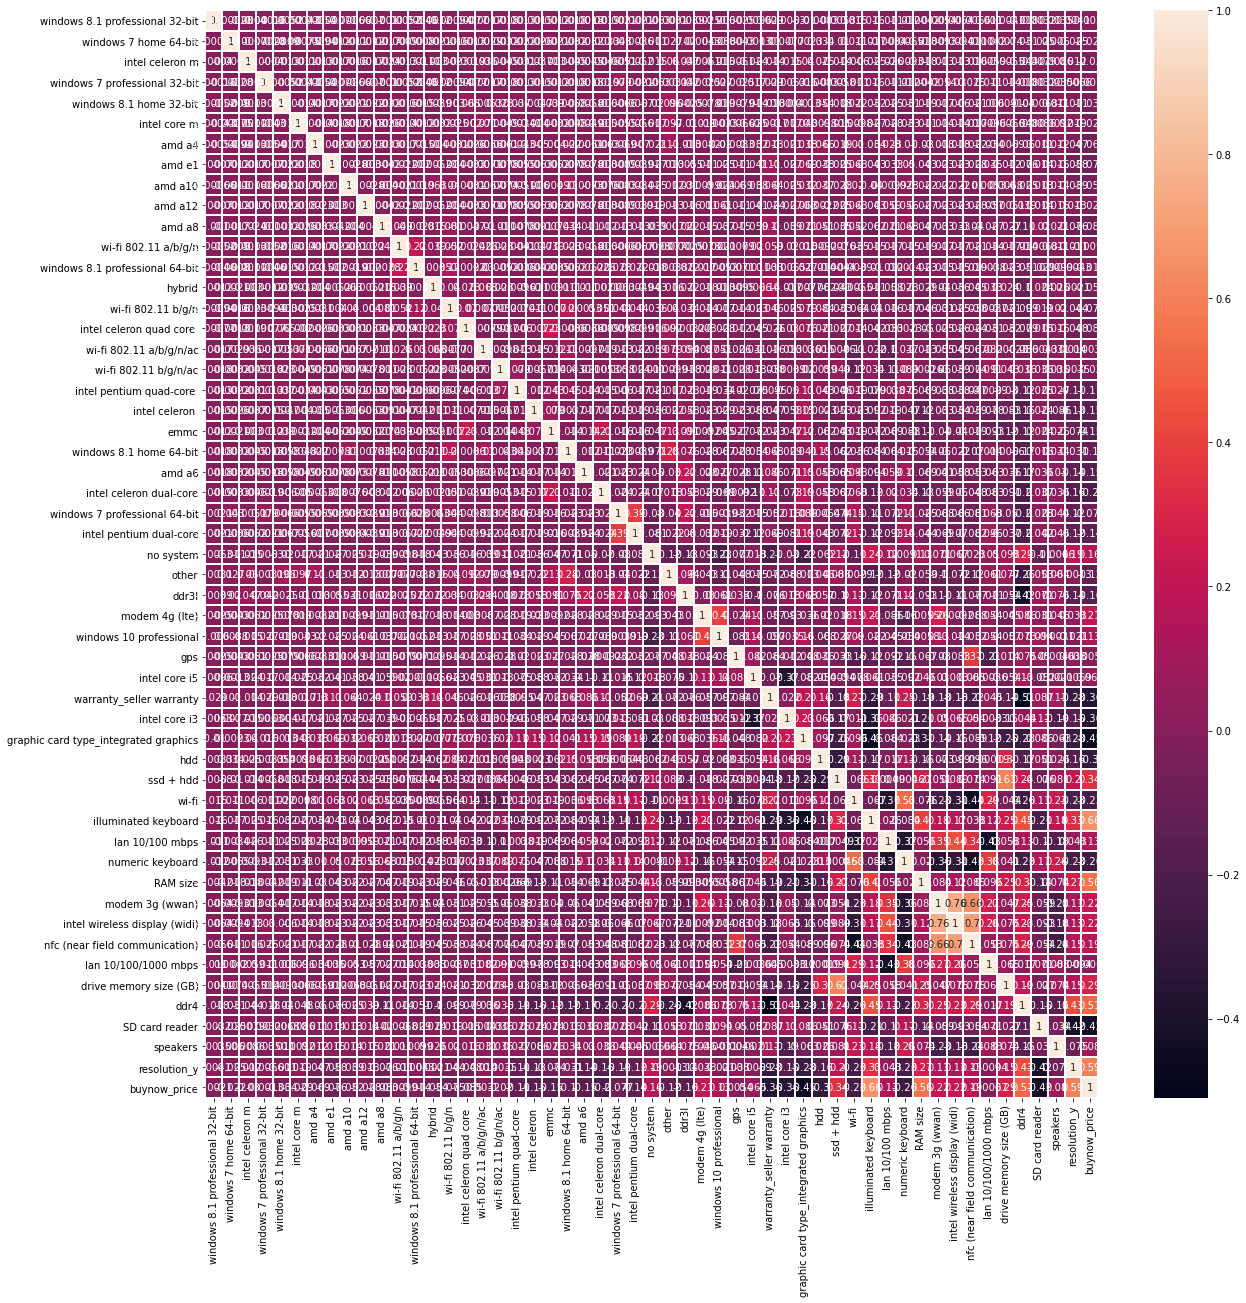

In [30]:
# correlation matrix of multicollinearity free dataset
plt.figure(figsize=(20, 20)) # width and height in inches
corr_df = pd.concat([new_df[selected_features], df[label_col]], axis=1)
sns.heatmap(corr_df.corr(),annot=True, lw=1)
plt.show()

## Train/Val/Test Split

In [31]:
# use the indeces of given datasets to properly separate it again as initial datasets
train_indeces = train_df.dropna().index
val_indeces = val_df.dropna().index
test_indeces = test_df.dropna().index

In [32]:
train_df = new_df.loc[train_indeces]
val_df = new_df.loc[val_indeces]
test_df = new_df.loc[test_indeces]

In [33]:
# sklearn machine learning models expect y_train, y_test, y_val 
# in the shape as (row_number, ) instead of (row_number, 1) shape, so apply .ravel()
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

In [34]:
X_train.shape

(3694, 52)

In [35]:
y_train.shape

(3694,)

##  Machine learning based regression

We will implement and try different machine learning models from Linear Regression to Ensemble Methods. We will measure root-mean-squared-error as instructed. We will scale our data with _MaxAbsScaler()_ from sklearn, which works well with sparse datasets.

Linear : 26508379707574.195
MLP : 719.6561002119159
DecisionTree : 656.6811883268169
RandomForest : 557.0123635130183
GradientBoosting : 526.9818640941238
ExtraTrees : 577.5740215020353


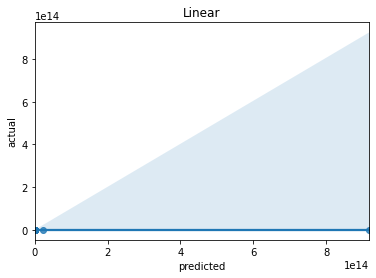

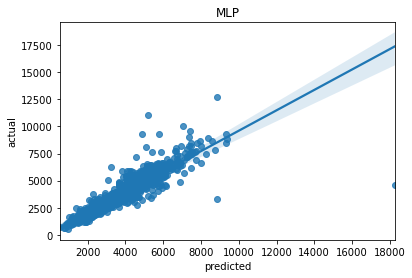

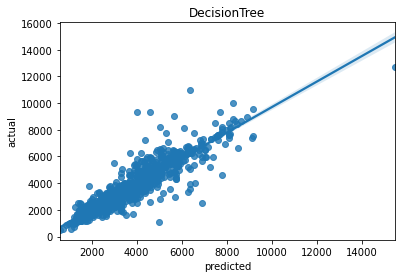

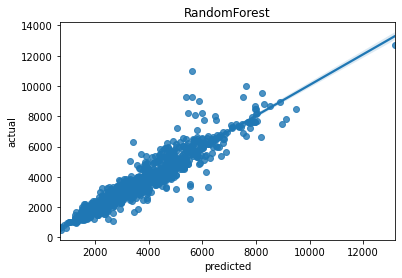

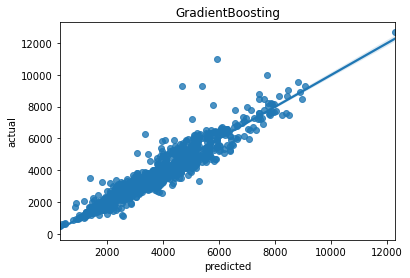

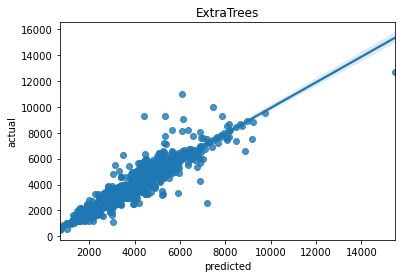

In [36]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

def rmse(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)


def regression(regressor_name, regressor):
#     alternative scaler 
#     pipe = make_pipeline(StandardScaler(), regressor)
    pipe = make_pipeline(MaxAbsScaler(), regressor)
    pipe.fit(X_train, y_train) 
    predicted = pipe.predict(X_test)
    rmse_val = rmse(y_test, predicted)
    print(regressor_name, ':', rmse_val)
    pred_df[regressor_name+'_Pred'] = predicted
    plt.figure(regressor_name)
    plt.title(regressor_name)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    sns.regplot(y=y_test,x=predicted)
    
regressors = {
    'Linear' : LinearRegression(),
    'MLP': MLPRegressor(random_state=42, max_iter=500, learning_rate="constant", learning_rate_init=0.6),
    'DecisionTree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42, criterion='squared_error',
                                                  loss='squared_error',learning_rate=0.6, warm_start=True),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
}

pred_df = pd.DataFrame(columns =["Actual"])
pred_df["Actual"] = y_test

for key in regressors.keys():
    regression(key, regressors[key])

Voting : 504.99219187047


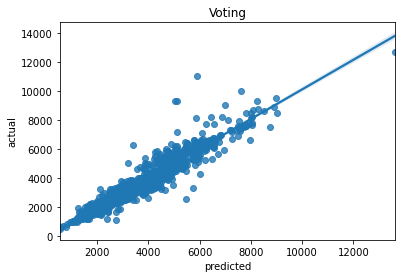

In [37]:
from sklearn.ensemble import VotingRegressor

# classifiers
reg1 = regressors["GradientBoosting"]
reg2 = regressors["ExtraTrees"]
reg3 = regressors["RandomForest"]

# take the highest performed three models and combine them in a voting mechanism
# assign weights to their predictions and create new regressor
regression("Voting", VotingRegressor([("gb", reg1), ("et", reg2), ("rf", reg3)], weights=[0.4, 0.35, 0.25]))

In [38]:
pred_df

,Actual,Linear_Pred,MLP_Pred,DecisionTree_Pred,RandomForest_Pred,GradientBoosting_Pred,ExtraTrees_Pred,Voting_Pred
0,2369.00,2525.501247,2281.069884,2369.000000,2314.900000,2476.255231,2369.000,2398.377092
1,2299.00,2446.430776,2308.562792,2395.666667,2294.250000,2252.793867,2299.000,2279.330047
2,5999.00,5052.237628,5132.973968,5063.285714,5003.982143,5103.177670,4999.000,5041.916604
3,1299.00,1172.384744,1288.382241,1325.615385,1263.420040,1254.143349,1261.500,1259.037350
4,3329.00,5921.164041,8828.099076,6274.000000,6224.232042,5281.607409,5908.600,5736.710974
...,...,...,...,...,...,...,...,...
1195,5599.00,5738.905491,5631.699560,5809.000000,5679.553571,5979.668993,5674.000,5797.655990
1196,2925.36,3037.257757,2735.188007,2755.001500,2895.425300,2794.022506,2879.000,2849.115327
1197,3799.00,4206.209228,4208.209337,4357.400000,4523.864381,4131.571809,4215.900,4259.159819
1198,5589.00,5040.368508,4914.287883,4872.000000,4913.655000,5201.863482,4471.535,4874.196393


It improves the performance of the RandomForest. We can go ahead with this voting model as our official solution. 

##  Deep learning based regression

Another promising regression algorithm is, artificial neural networks. We will create a small one with 4 hidden units, since we have small data. We will use scheduler to decrease learning rate after a certain epoch number. Also, to prevent overfitting, we will use EarlyStopping. 

We will make a comparison between a complex model (two hidden layers) and base model to see what works best. 

In [39]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from keras import backend as K
# set random for reproducibility
tf.random.set_seed(42)


# define the error metric using keras background
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)
    

# define base model architecture
def build_and_compile_base_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(4, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None,len(selected_features)))
    return model

# define complex model architecture
def build_and_compile_complex_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(8, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None,len(selected_features)))
    return model

In [40]:
# compile base model
dnn_model = build_and_compile_base_model()

2022-04-03 21:54:58.079146: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [41]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 52)               105       
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                3392      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3,762
Trainable params: 3,657
Non-trainable params: 105
____________________________________________________

In [42]:
# initialize scheduler and early stopping callback
scheduler_c = tf.keras.callbacks.LearningRateScheduler(scheduler)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20, verbose=1,
    mode='auto', baseline=None, restore_best_weights=True)

# train base model
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks = [scheduler_c, early_stopping],
    verbose=1, epochs=400)

Epoch 1/400
116/116 [==============================] - 1s 2ms/step - loss: 1941.2336 - val_loss: 1309.3765 - lr: 0.0050
Epoch 2/400
116/116 [==============================] - 0s 1ms/step - loss: 1329.2891 - val_loss: 1277.6927 - lr: 0.0050
Epoch 3/400
116/116 [==============================] - 0s 1ms/step - loss: 1293.8693 - val_loss: 1257.2695 - lr: 0.0050
Epoch 4/400
116/116 [==============================] - 0s 1ms/step - loss: 1267.0271 - val_loss: 1211.8590 - lr: 0.0050
Epoch 5/400
116/116 [==============================] - 0s 1ms/step - loss: 1213.0170 - val_loss: 1163.2268 - lr: 0.0050
Epoch 6/400
116/116 [==============================] - 0s 1ms/step - loss: 1160.7650 - val_loss: 1153.5107 - lr: 0.0050
Epoch 7/400
116/116 [==============================] - 0s 1ms/step - loss: 1100.0266 - val_loss: 1030.9146 - lr: 0.0050
Epoch 8/400
116/116 [==============================] - 0s 1ms/step - loss: 1048.7467 - val_loss: 1013.2138 - lr: 0.0050
Epoch 9/400
116/116 [===================

116/116 [==============================] - 0s 1ms/step - loss: 764.5903 - val_loss: 672.7831 - lr: 0.0017
Epoch 138/400
116/116 [==============================] - 0s 1ms/step - loss: 760.1644 - val_loss: 682.7137 - lr: 0.0017
Epoch 139/400
116/116 [==============================] - 0s 1ms/step - loss: 769.7778 - val_loss: 704.0004 - lr: 0.0017
Epoch 140/400
116/116 [==============================] - 0s 1ms/step - loss: 751.9671 - val_loss: 674.6420 - lr: 0.0017
Epoch 141/400
116/116 [==============================] - 0s 1ms/step - loss: 760.1834 - val_loss: 659.3582 - lr: 0.0016
Epoch 142/400
116/116 [==============================] - 0s 1ms/step - loss: 761.3748 - val_loss: 660.5126 - lr: 0.0016
Epoch 143/400
116/116 [==============================] - 0s 1ms/step - loss: 759.5349 - val_loss: 670.4743 - lr: 0.0016
Epoch 144/400
116/116 [==============================] - 0s 1ms/step - loss: 767.9759 - val_loss: 658.9989 - lr: 0.0016
Epoch 145/400
116/116 [==============================]

Epoch 205/400
116/116 [==============================] - 0s 1ms/step - loss: 752.4759 - val_loss: 645.7489 - lr: 8.6887e-04
Epoch 206/400
116/116 [==============================] - 0s 1ms/step - loss: 742.7974 - val_loss: 645.2593 - lr: 8.6023e-04
Epoch 207/400
116/116 [==============================] - 0s 1ms/step - loss: 752.1895 - val_loss: 644.9681 - lr: 8.5167e-04
Epoch 208/400
116/116 [==============================] - 0s 1ms/step - loss: 743.5911 - val_loss: 646.7750 - lr: 8.4319e-04
Epoch 209/400
116/116 [==============================] - 0s 1ms/step - loss: 733.9046 - val_loss: 659.7396 - lr: 8.3480e-04
Epoch 210/400
116/116 [==============================] - 0s 1ms/step - loss: 756.2173 - val_loss: 650.8627 - lr: 8.2650e-04
Epoch 211/400
116/116 [==============================] - 0s 1ms/step - loss: 737.4901 - val_loss: 642.8203 - lr: 8.1827e-04
Epoch 212/400
116/116 [==============================] - 0s 1ms/step - loss: 760.2380 - val_loss: 643.0320 - lr: 8.1013e-04
Epoch 21

116/116 [==============================] - 0s 1ms/step - loss: 731.3018 - val_loss: 638.4832 - lr: 4.4908e-04
Epoch 272/400
116/116 [==============================] - 0s 1ms/step - loss: 738.4278 - val_loss: 635.9990 - lr: 4.4461e-04
Epoch 273/400
116/116 [==============================] - 0s 1ms/step - loss: 733.6081 - val_loss: 635.4655 - lr: 4.4018e-04
Epoch 274/400
116/116 [==============================] - 0s 1ms/step - loss: 739.8774 - val_loss: 637.3318 - lr: 4.3580e-04
Epoch 275/400
116/116 [==============================] - 0s 1ms/step - loss: 746.2734 - val_loss: 639.0476 - lr: 4.3147e-04
Epoch 276/400
116/116 [==============================] - 0s 1ms/step - loss: 717.4134 - val_loss: 634.1638 - lr: 4.2718e-04
Epoch 277/400
116/116 [==============================] - 0s 1ms/step - loss: 731.3665 - val_loss: 641.0087 - lr: 4.2292e-04
Epoch 278/400
116/116 [==============================] - 0s 1ms/step - loss: 733.3887 - val_loss: 634.8320 - lr: 4.1872e-04
Epoch 279/400
116/116 

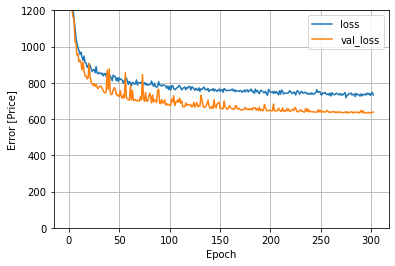

In [43]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1200])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [44]:
# test model
dnn_model.evaluate(X_test, y_test, verbose=1)

38/38 [==============================] - 0s 717us/step - loss: 718.0094


718.0093994140625

Base model perform worse than voting regression. Check the complex model.

In [45]:
# compile complex model
dnn_model = build_and_compile_complex_model()

In [46]:
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 52)               105       
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                3392      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                      

In [47]:
# train complex model
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks = [scheduler_c, early_stopping],
    verbose=1, epochs=50)

Epoch 1/50
116/116 [==============================] - 0s 2ms/step - loss: 2039.3521 - val_loss: 1297.9049 - lr: 0.0050
Epoch 2/50
116/116 [==============================] - 0s 1ms/step - loss: 1330.5768 - val_loss: 1287.4249 - lr: 0.0050
Epoch 3/50
116/116 [==============================] - 0s 1ms/step - loss: 1303.7808 - val_loss: 1241.9270 - lr: 0.0050
Epoch 4/50
116/116 [==============================] - 0s 1ms/step - loss: 1271.9644 - val_loss: 1199.0645 - lr: 0.0050
Epoch 5/50
116/116 [==============================] - 0s 1ms/step - loss: 1210.9304 - val_loss: 1129.3450 - lr: 0.0050
Epoch 6/50
116/116 [==============================] - 0s 1ms/step - loss: 1125.7739 - val_loss: 1018.9751 - lr: 0.0050
Epoch 7/50
116/116 [==============================] - 0s 1ms/step - loss: 1074.1094 - val_loss: 983.8926 - lr: 0.0050
Epoch 8/50
116/116 [==============================] - 0s 1ms/step - loss: 1017.5908 - val_loss: 945.1708 - lr: 0.0050
Epoch 9/50
116/116 [==============================

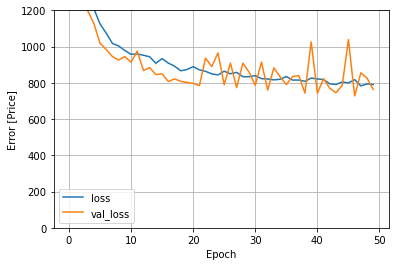

In [48]:
plot_loss(history)

In [49]:
# test complex model
dnn_model.evaluate(X_test, y_test, verbose=1)

38/38 [==============================] - 0s 768us/step - loss: 797.4825


797.4824829101562

This result is slightly worse than base model. Probably, our task is not so complex to solve with deep neural networks. So, we choose voting regressor performance as best for this dataset among all explored algorithms.

##  Feature Selection

Feature selection hurts the performance in this task. However, it is always best to present all the methods applied through the assigment. Hence, we are representing it also. We used f_regression and RandomForestRegressor.model_importances_ to check feature importance. We decided k=15, but you can change and see the results for different k values.

In [50]:
from sklearn.feature_selection import SelectKBest, f_regression
#Select top 25 features based on f-regression
selector = SelectKBest(f_regression, k =25)
X = new_df[selected_features].to_numpy()
y = df[label_col].to_numpy().ravel()
selector.fit(X, y)
cols = new_df[selected_features].columns[selector.get_support()].to_list()
cols

['intel celeron ',
 'emmc',
 'amd a6',
 'intel celeron dual-core',
 'intel pentium dual-core',
 'no system',
 'ddr3l',
 'modem 4g (lte)',
 'warranty_seller warranty',
 'intel core i3',
 'graphic card type_integrated graphics',
 'hdd',
 'ssd + hdd',
 'wi-fi',
 'illuminated keyboard',
 'lan 10/100 mbps',
 'numeric keyboard',
 'RAM size',
 'modem 3g (wwan)',
 'intel wireless display (widi)',
 'nfc (near field communication)',
 'drive memory size (GB)',
 'ddr4',
 'SD card reader',
 'resolution_y']

In [51]:
X_train, X_val, X_test = train_df[cols].to_numpy(), val_df[cols].to_numpy(), test_df[cols].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

RandomForest : 689.5841293235402


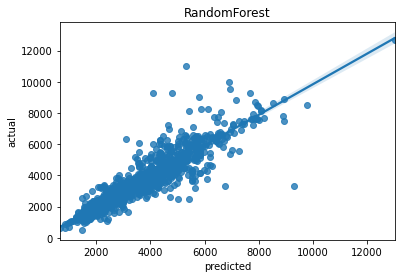

In [52]:
regression('RandomForest', regressors['RandomForest'])

Feature: windows 8.1 professional 32-bit , Score: 4.973371134104074e-06
Feature: windows 7 home 64-bit , Score: 0.0
Feature: intel celeron m , Score: 3.943939831647907e-05
Feature: windows 7 professional 32-bit , Score: 0.0
Feature: windows 8.1 home 32-bit , Score: 5.0467194254702984e-05
Feature: intel core m , Score: 0.00020479544394336958
Feature: amd a4 , Score: 0.00023012608983633226
Feature: amd e1 , Score: 7.565799456190145e-05
Feature: amd a10 , Score: 0.00019426092177305207
Feature: amd a12 , Score: 0.00024066812922089715
Feature: amd a8 , Score: 0.00017034014453873547
Feature: wi-fi 802.11 a/b/g/n , Score: 0.00022288687987535765
Feature: windows 8.1 professional 64-bit , Score: 0.001235310470718396
Feature: hybrid , Score: 0.000499177576732892
Feature: wi-fi 802.11 b/g/n , Score: 0.0001526397408483957
Feature: intel celeron quad core  , Score: 7.357701733413615e-05
Feature: wi-fi 802.11 a/b/g/n/ac , Score: 0.001067458351317804
Feature: wi-fi 802.11 b/g/n/ac , Score: 0.00059604

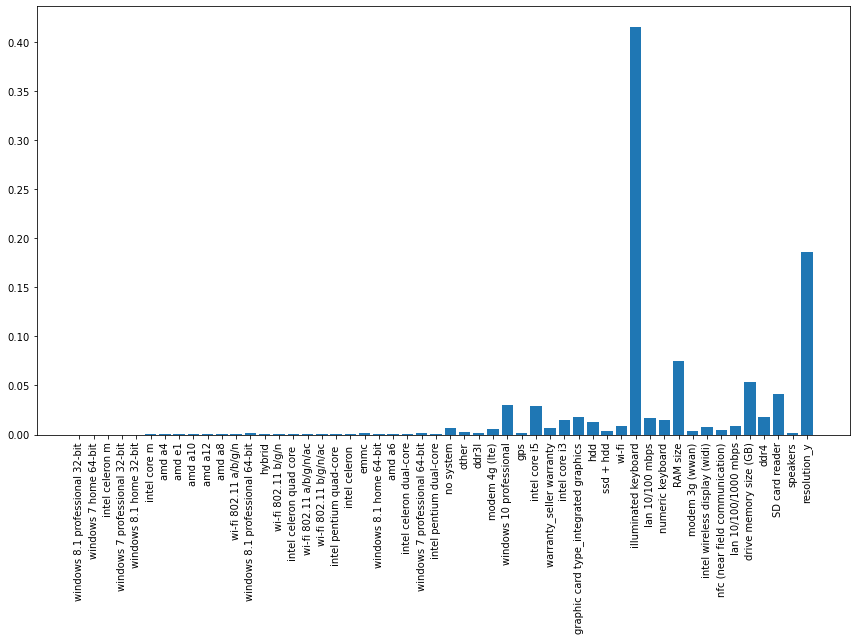

In [53]:
X = new_df[selected_features].values
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()
model = RandomForestRegressor(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f"Feature: {selected_features[i]} , Score: {v}")
# plot feature importance
plt.figure(figsize=(12, 9)) # width and height in inches
plt.bar(selected_features, importance)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [54]:
feats_w_highest_importance = np.array(selected_features)[importance > 0.02].tolist()
feats_w_highest_importance

['windows 10 professional',
 'intel core i5',
 'illuminated keyboard',
 'RAM size',
 'drive memory size (GB)',
 'SD card reader',
 'resolution_y']

In [55]:
X_train, X_val, X_test = train_df[feats_w_highest_importance].to_numpy(), val_df[feats_w_highest_importance].to_numpy(), test_df[feats_w_highest_importance].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

RandomForest : 712.3894667966214


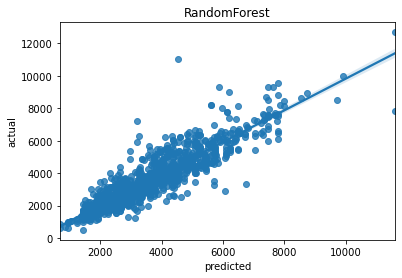

In [56]:
regression('RandomForest', regressors['RandomForest'])

Still, the complete feature set provides better result comparing to features with highest importance.